In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## EDA

## Univariate

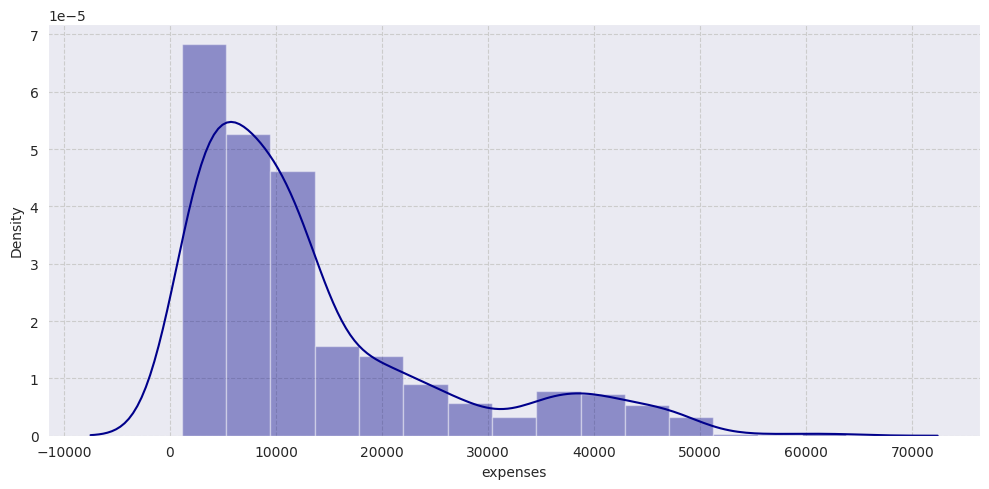

In [7]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['expenses'],bins=15,color='darkblue')
plt.tight_layout()
plt.grid(True)
plt.show()

Distribution of expenses is right skewed.

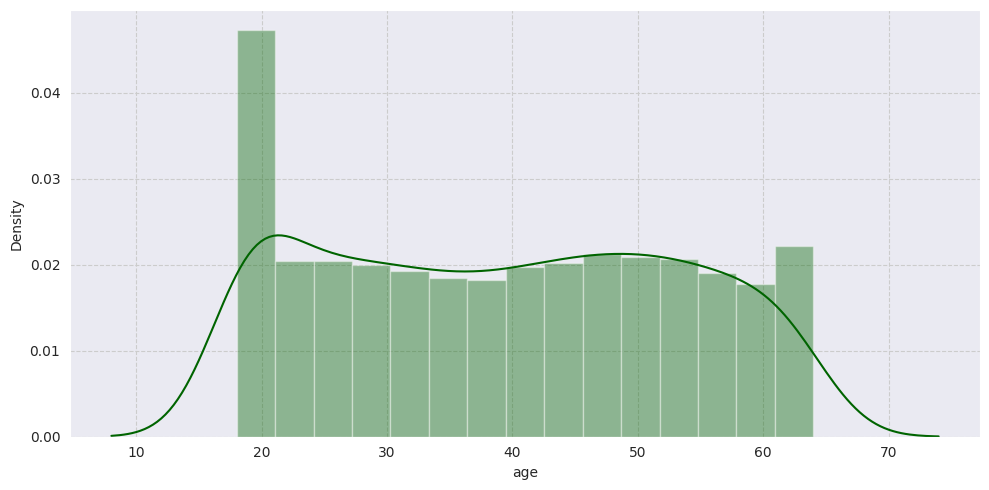

In [8]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['age'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

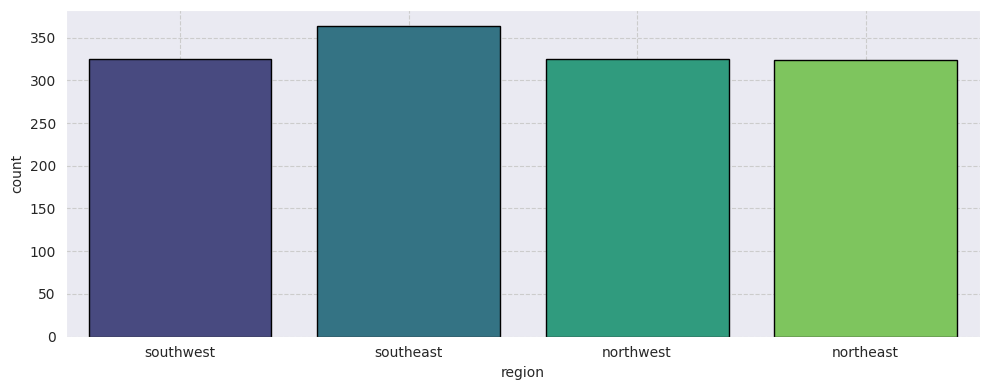

In [9]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['region'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

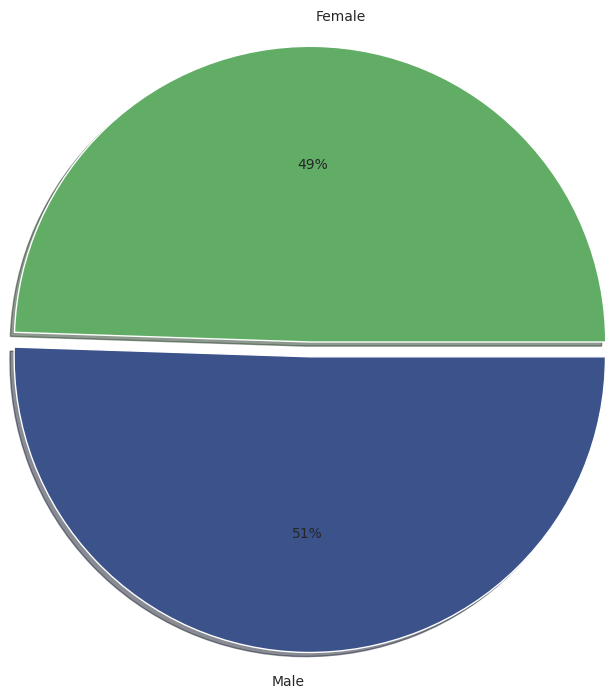

In [10]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['sex'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

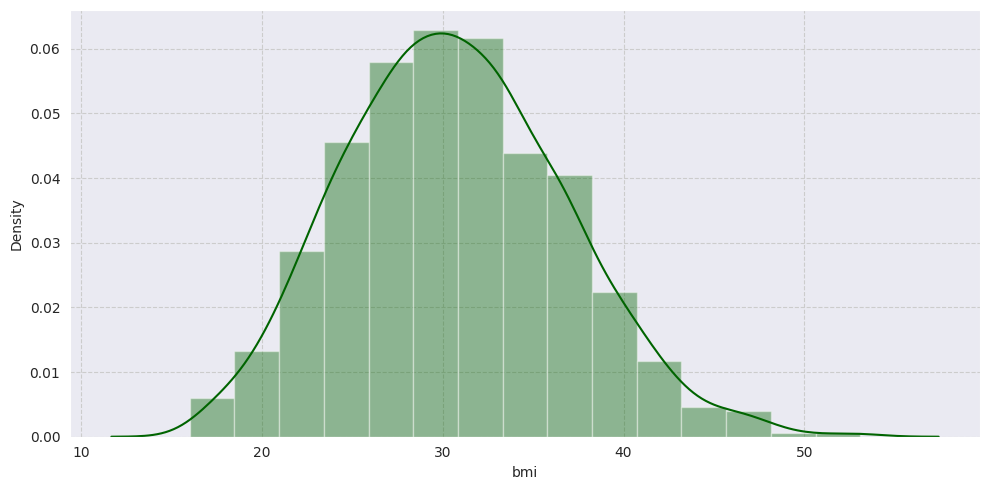

In [11]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['bmi'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

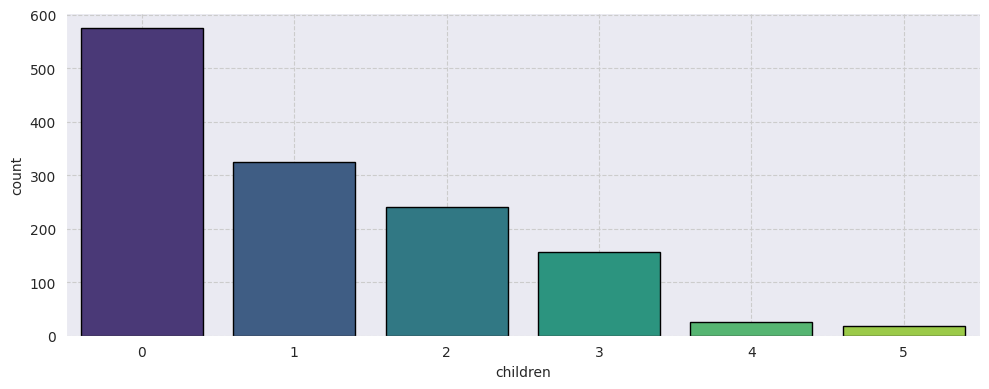

In [12]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['children'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

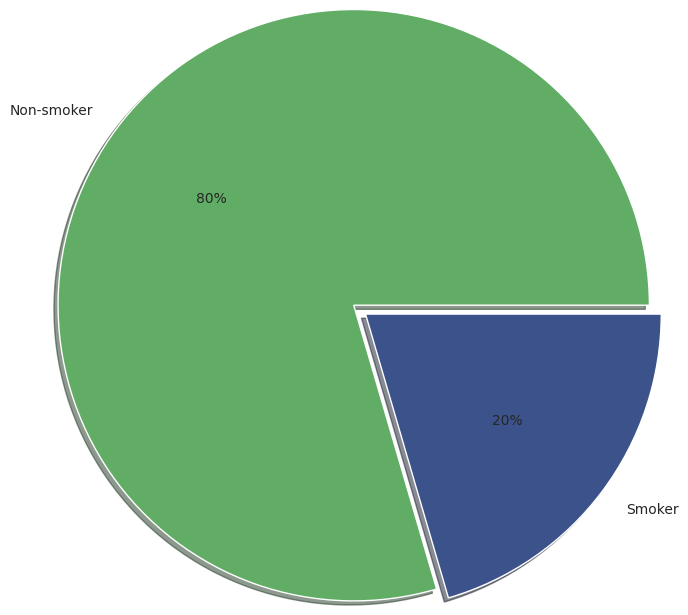

In [13]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of smoker
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

# Multivariate

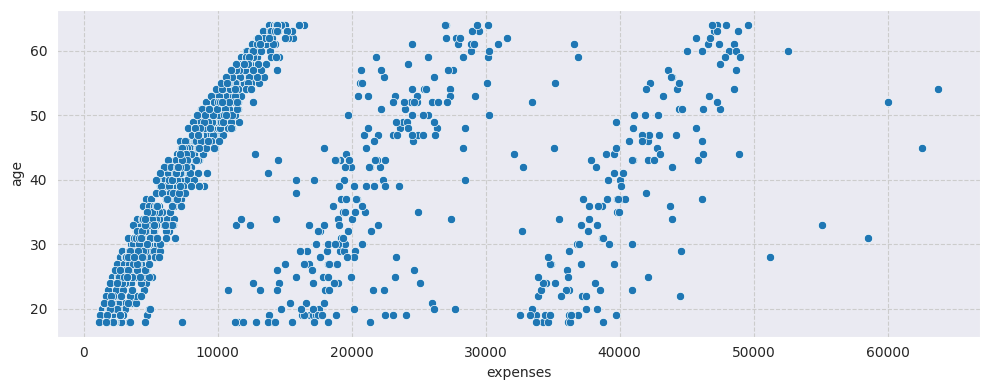

In [14]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()


In this graph you can see that younger applicants have lower expenses and older applicants have higher expenses.

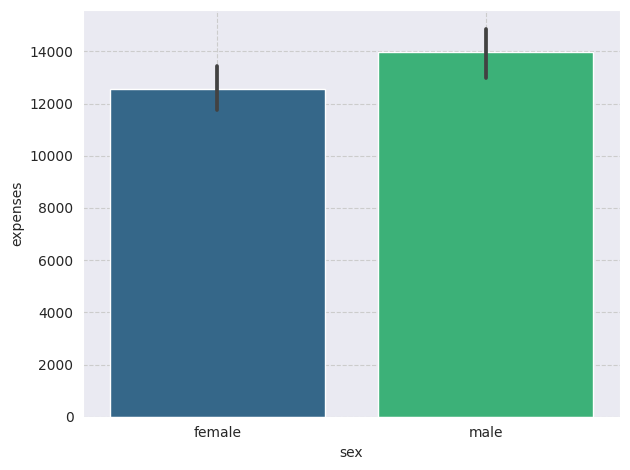

In [15]:
sns.barplot(x='sex',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()


Male applicant have a bit higher expense as compared to female.

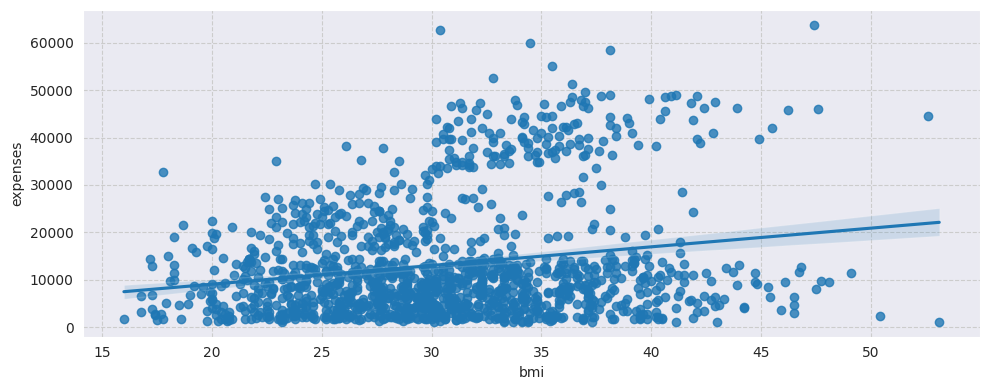

In [16]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()


There is a slight positive relation between BMI and expense

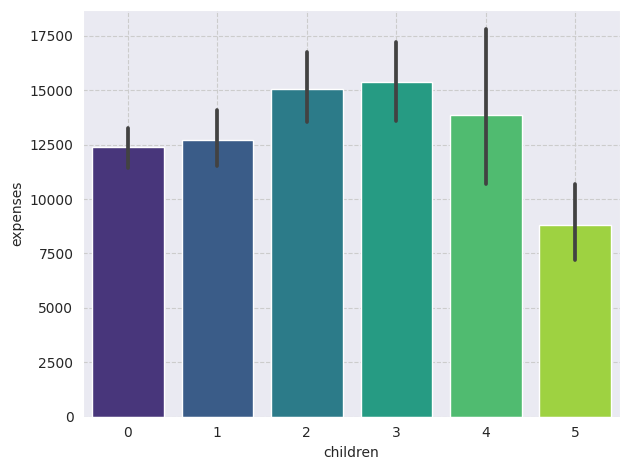

In [17]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Applicant with 2 or 3 children have higher expenses

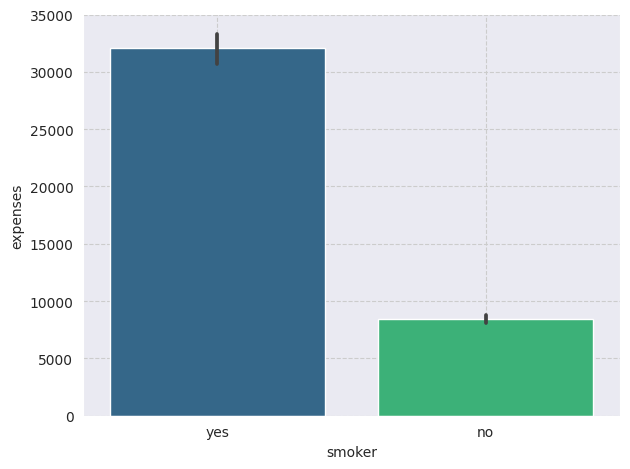

In [18]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Smokers have insurance of high expense.

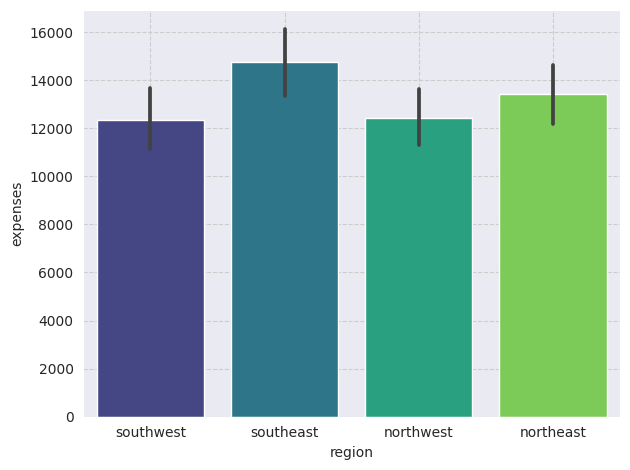

In [19]:
sns.barplot(x='region',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Applicant from southeast have higher expenses.

# Data Preprocessing

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Converting categorical to numerical

In [21]:
data=df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [23]:
df['region'] = labelencoder.fit_transform(df['region'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


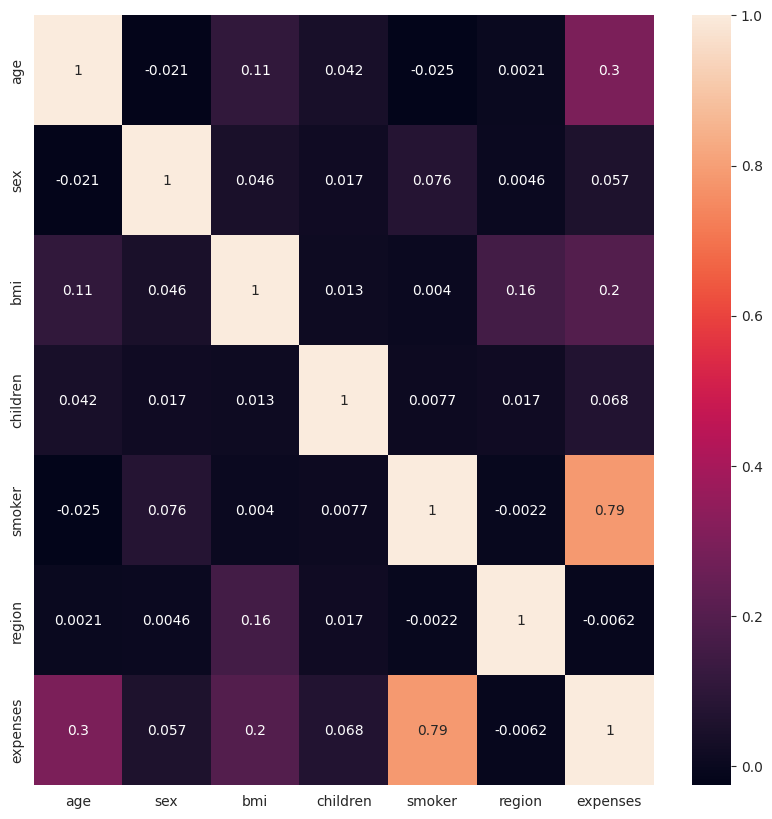

In [27]:
corr_data = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot=True)
plt.show()

Train-test Split

In [28]:
X=df.drop('expenses',axis=1)
y=df.expenses

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

Model Fitting

In [30]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [32]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MS_score' : mean_squared_error(y_test,pred_lr)
    })

pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr))

Testing R2 Score:  70.95986574211389 
Testing mean squared:  41821107.58034336


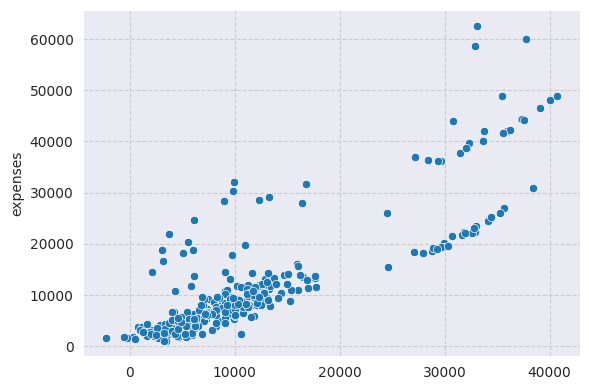

In [33]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

KNN Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
model_knn= KNeighborsRegressor()
model_knn.fit(X_train,y_train)
pred_knn=model_knn.predict(X_test)

In [35]:
scores.append({
        'model': 'KNN Regressor',
        'r2_score': r2_score(y_test, pred_knn)*100,
    'MS_score' : mean_squared_error(y_test,pred_knn)
    })

pred=pred_knn

print('Testing R2 Score: ', r2_score(y_test, pred_knn)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_knn))

Testing R2 Score:  11.528921906577683 
Testing mean squared:  127408449.34934199


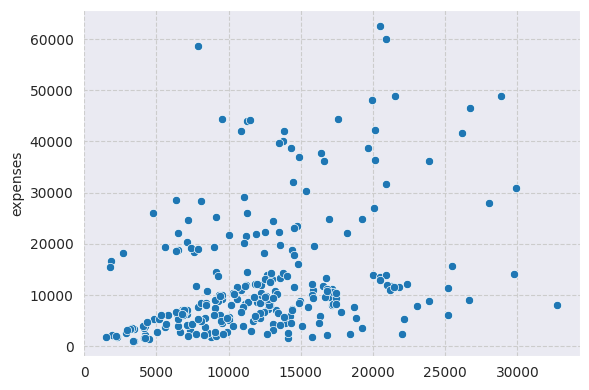

In [36]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

SV Regressor

In [37]:
from sklearn.svm import SVR
model_svr= SVR()
model_svr.fit(X_train,y_train)
pred_svr=model_svr.predict(X_test)

In [38]:
scores.append({
        'model': 'SVR Regressor',
        'r2_score': r2_score(y_test, pred_svr)*100,
        'MS_score' : mean_squared_error(y_test,pred_svr)
    })

pred=pred_svr

print('Testing R2 Score: ', r2_score(y_test, pred_svr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_svr))

Testing R2 Score:  -9.085319089783962 
Testing mean squared:  157095309.01535234


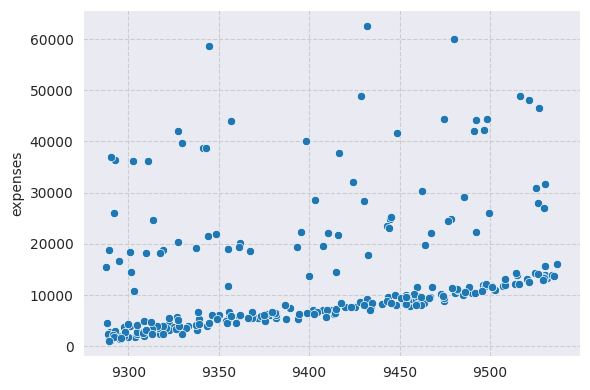

In [39]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [41]:
scores.append({
        'model': 'Decision Tree',
        'r2_score': r2_score(y_test, pred_dt)*100,
    'MS_score' : mean_squared_error(y_test,pred_dt)
    })

pred=pred_dt

print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_dt))

Testing R2 Score:  74.56202465468888 
Testing mean squared:  36633587.64443321


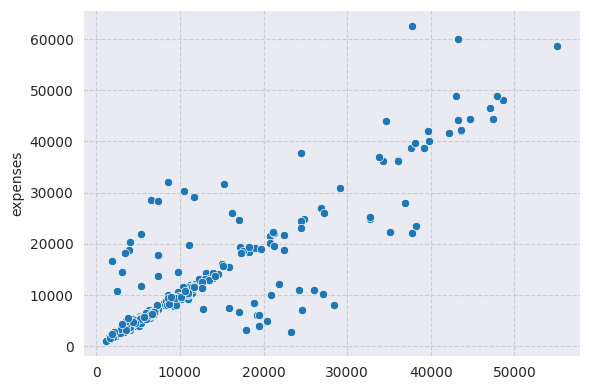

In [42]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

Random Forest Regressor

In [43]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

In [44]:
scores.append({
        'model': 'Random Forest',
        'r2_score': r2_score(y_test, pred_rf)*100,
    'MS_score' : mean_squared_error(y_test,pred_rf)
    })

pred=pred_rf

print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_rf))

Testing R2 Score:  82.5428959883493 
Testing mean squared:  25140222.0950211


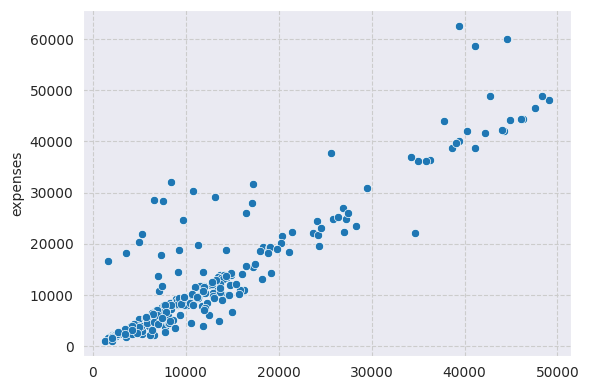

In [45]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
pred_gbr = model_gbr.predict(X_test)

In [47]:
scores.append({
        'model': 'GB Regressor',
        'r2_score': r2_score(y_test, pred_gbr)*100,
    'MS_score' : mean_squared_error(y_test,pred_gbr)
    })

pred=pred_gbr

print('Testing R2 Score: ', r2_score(y_test, pred_gbr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_gbr))

Testing R2 Score:  83.02967745937893 
Testing mean squared:  24439201.222071134


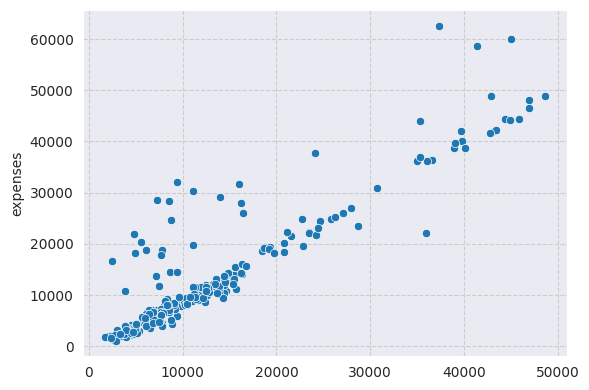

In [48]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

XGBoost Regressor

In [49]:
from xgboost import XGBRFRegressor

model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [50]:
scores.append({
        'model': 'XGB regressor',
        'r2_score': r2_score(y_test, pred_xgb)*100,
    'MS_score' : mean_squared_error(y_test,pred_xgb)
    })

pred=pred_xgb

print('Testing R2 Score: ', r2_score(y_test, pred_xgb)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_xgb))

Testing R2 Score:  83.0677778185705 
Testing mean squared:  24384332.356574483


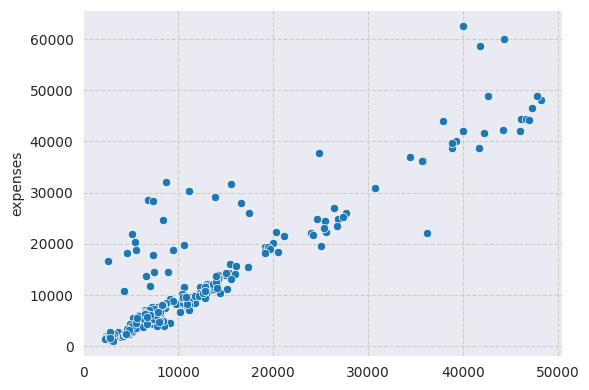

In [51]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

Model Evaluation

In [52]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MS_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score

,model,r2_score,MS_score
6,XGB regressor,83.067778,2.438433e+07
5,GB Regressor,83.029677,2.443920e+07
4,Random Forest,82.542896,2.514022e+07
3,Decision Tree,74.562025,3.663359e+07
0,Linear Regression,70.959866,4.182111e+07
1,KNN Regressor,11.528922,1.274084e+08
2,SVR Regressor,-9.085319,1.570953e+08


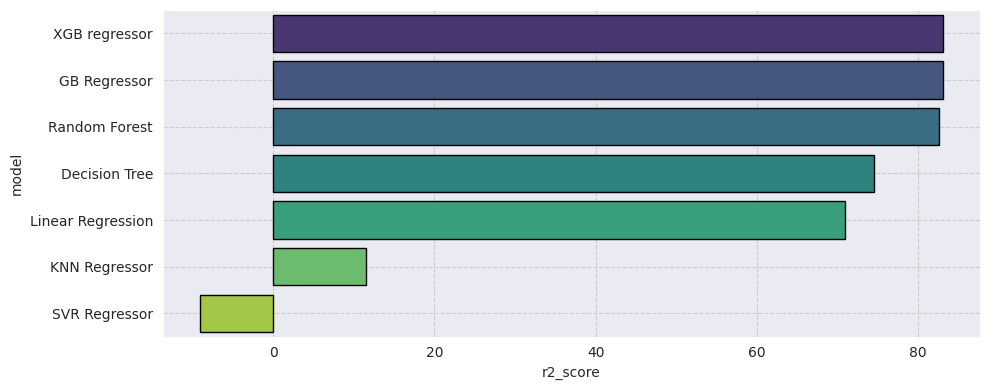

In [53]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['r2_score'],palette='viridis',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Here XG Boost regressor is the best model to fit.

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,accuracy_score

In [96]:
def objective(trial,x,y):
        train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)
        """Trying to find the best paramaters"""
        params = {
            'max_depth': trial.suggest_int('max_depth', 1, 8),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
            'n_estimators': trial.suggest_int('n_estimators', 50, 400),
            'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'subsample': trial.suggest_float('subsample', 0.01, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
            # 'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
            # 'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
            'eval_metric': 'rmse',
            'early_stopping_rounds': 10,
            'use_label_encoder': False
        }
        # Fit the model
        eval_set=[(test_x,test_y)]
        optuna_model = XGBRegressor(**params)
        optuna_model.fit(train_x, train_y, eval_set=eval_set, verbose=False)
        #optuna_model.fit(train_x, train_y)
        # Make predictions
        y_pred = optuna_model.predict(test_x)
        # Evaluate predictions
        accuracy = accuracy_score(test_y, y_pred)
        return accuracy

In [92]:
def fine_tune(x,y):
    xgb_regression_oputuna = optuna.create_study(direction='maximize')
    func = lambda trial:objective(trial,x,y)
    xgb_regression_oputuna.optimize(func , n_trials = 100)
    param = xgb_regression_oputuna.best_params
    return param
    

In [97]:
param=fine_tune(X_train,y_train)

[I 2023-04-28 01:52:28,659] A new study created in memory with name: no-name-c36b4efe-7696-459a-a276-f501e6a98ce5
[W 2023-04-28 01:52:29,069] Trial 0 failed with parameters: {'max_depth': 8, 'learning_rate': 0.3623373245637135, 'n_estimators': 196, 'gamma': 0.14539889445037546, 'min_child_weight': 7, 'subsample': 0.8411817667155429, 'colsample_bytree': 0.3190517576874477} because of the following error: ValueError('continuous is not supported').
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_6490/3106373208.py", line 3, in <lambda>
    func = lambda trial:objective(trial,x,y)
  File "/tmp/ipykernel_6490/1373047773.py", line 26, in objective
    accuracy = accuracy_score(test_y, y_pred)
  File "/config/.local/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/config

ValueError: continuous is not supported

In [100]:
## Hyper Parameter Optimization
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

In [101]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
     

In [ ]:
xgb_clf = XGBClassifier(**param)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_cv = GridSearchCV(
    estimator=regressor,
    param_grid=hyperparameter_grid,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [109]:
random_cv.fit(X_train,y_train)


Fitting 10 folds for each of 3200 candidates, totalling 32000 fits


/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/config/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/config/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
 